In [113]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
from collections import Counter  

In [114]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
#         name = data_['接单时间']
#         list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def wenzi1(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
        name = data_['接单时间1']
        list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [115]:
lujing = '七夕订单.csv'
code = 'gbk'
data = improt_data(lujing,code)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [116]:
lujing = '问题订单.csv'
code = 'gbk'
wrong = improt_data(lujing,code)

8109

# data   wrong下单时间类型转换


In [26]:
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d %H:%M:%S')
wrong['下单时间'] = pd.to_datetime(wrong['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [27]:
data['下单时间_day'] = data['下单时间'].dt.day
data['下单时间_hour'] = data['下单时间'].dt.hour

In [28]:
data['下单时间'].count()

57028

In [29]:
drop_du(data,'下单时间_day')

[[26, 24, 25], {26: 580, 24: 11053, 25: 45394}, [23]]

In [30]:
df24 = data[data['下单时间_day'] == 24]

In [52]:
df25 = data[data['下单时间_day'] == 25]

In [53]:
df24[df24['订单状态'] == '订单取消']['订单编号'].count()

1060

In [54]:
df25[df25['订单状态'] == '订单取消']['订单编号'].count()

5982

In [55]:
data = data[data['下单时间_day'] < 26]
data['订单编号'].count()

56448

# wrong用户催单  485

In [56]:
wrong['下单时间'].count()

12660

In [69]:
wrong['订单编号'].count()
wrong[wrong['商家服务问题']=='用户催单；\t']['订单编号'].count()

6233

# 三种订单数量

In [70]:
data.drop_duplicates(subset='订单状态',keep='last',inplace=False)['订单状态']

57019     订单取消
57024    订单已处理
57027     订单完成
Name: 订单状态, dtype: object

In [71]:
data_quxiao = data[data['订单状态'] == '订单取消']

data_quxiao['订单编号'].count()

7043

# 合并 136 

In [72]:
data_quxiao_wrong = pd.merge(data_quxiao,wrong,on= ['订单编号'])
data_quxiao_wrong['订单编号'].count()


2424

In [73]:
lis = ['质量问题','拣货超时','商家少送错送','缺货','商家超时未接单','商家拒单','用户催单']
for i in lis:
    a = wenzi(wrong,i,'商家服务问题')

关于“质量问题”的订单数量是： 67
关于“拣货超时”的订单数量是： 4630
关于“商家少送错送”的订单数量是： 105
关于“缺货”的订单数量是： 352
关于“商家超时未接单”的订单数量是： 471
关于“商家拒单”的订单数量是： 817
关于“用户催单”的订单数量是： 6803


In [74]:
for i in lis:
    a = wenzi(data_quxiao_wrong,i,'商家服务问题')

关于“质量问题”的订单数量是： 67
关于“拣货超时”的订单数量是： 20
关于“商家少送错送”的订单数量是： 98
关于“缺货”的订单数量是： 346
关于“商家超时未接单”的订单数量是： 461
关于“商家拒单”的订单数量是： 820
关于“用户催单”的订单数量是： 719


In [79]:
wrong['订单编号'].count()

12660

In [80]:
data_quxiao_wrong[data_quxiao_wrong['商品实付销售额'] <= 10]['下单时间_x']

683    2020-08-25 07:55:17
684    2020-08-25 10:37:59
1051   2020-08-25 15:20:29
1053   2020-08-24 20:54:24
1064   2020-08-25 13:40:03
1067   2020-08-25 14:22:13
1255   2020-08-25 14:52:59
Name: 下单时间_x, dtype: datetime64[ns]

In [81]:
drop_du(data_quxiao_wrong,'商家服务问题')

[['商家少送错送；拣货超时；\t',
  '质量问题导致退款；拣货超时；\t',
  '拣货超时；\t',
  '缺货导致退款；用户催单；\t',
  '商家少送错送；用户催单；\t',
  '质量问题导致退款；\t',
  '商家少送错送；\t',
  '商家拒单；用户催单；\t',
  '质量问题导致退款；用户催单；\t',
  '缺货导致退款；\t',
  '商家拒单；\t',
  '用户催单；\t',
  '商家超时未接单；\t'],
 {'商家少送错送；拣货超时；\t': 2,
  '质量问题导致退款；拣货超时；\t': 7,
  '拣货超时；\t': 9,
  '缺货导致退款；用户催单；\t': 28,
  '商家少送错送；用户催单；\t': 28,
  '质量问题导致退款；\t': 45,
  '商家少送错送；\t': 65,
  '商家拒单；用户催单；\t': 22,
  '质量问题导致退款；用户催单；\t': 12,
  '缺货导致退款；\t': 315,
  '商家拒单；\t': 798,
  '用户催单；\t': 627,
  '商家超时未接单；\t': 461},
 ['商家少送错送；质量问题导致退款；拣货超时；\t',
  '质量问题导致退款；拣货超时；用户催单；\t',
  '缺货导致退款；质量问题导致退款；\t',
  '商家少送错送；缺货导致退款；\t',
  '商家少送错送；缺货导致退款；用户催单；\t']]

# quxiao  wrong  是否预定单

In [82]:

drop_du(data,'是否预订单')

[['是', '否'], {'是': 8041, '否': 48407}, []]

In [83]:
drop_du(data_quxiao,'是否预订单')

[['是', '否'], {'是': 821, '否': 6222}, []]

In [84]:
drop_du(data_quxiao_wrong,'是否预订单')

[['是', '否'], {'是': 146, '否': 2278}, []]

# 预订单的  取消  问题 单 

In [323]:
data_quxiao_wrong_yuding  = data_quxiao_wrong[data_quxiao_wrong['是否预订单'] == '是']
data_quxiao_wrong_yuding_list = list(data_quxiao_wrong_yuding['店铺名称_x'])
b = len(data_quxiao_wrong_yuding_list)

collection_b = Counter(data_quxiao_wrong_yuding_list)
data_quxiao_wrong_yuding_list
print(collection_b)

Counter({'溢清园花卉·七夕鲜花\t': 9, '幸福花店（七夕预定，表白，鲜花）\t': 6, '怡芬花店\t': 6, '花生活鲜花（花之都鲜花批发行）\t': 3, '博艺坊·七夕鲜花\t': 3, '爱尚花艺鲜花\t': 3, '应姐鲜花店（七夕情人节，告白，生日）\t': 3, '千色花艺（七夕情人节，礼物，鲜花）\t': 3, '花生活鲜花（爱荷花坊）\t': 2, '花生活鲜花（有钱花）\t': 2, '花生活鲜花（花之翼）\t': 2, '花生活鲜花（花房姑娘鲜花店）\t': 2, '花生活鲜花（卓伊鲜花青秀区店）\t': 2, '花花世界（七夕预定，表白，鲜花）\t': 2, '花意浓·七夕鲜花\t': 2, '鼎胜婚礼\t': 2, '吉祥花店（七夕预定，表白，鲜花）\t': 2, '喜＋喜花艺（七夕情人节，告白，鲜花）\t': 2, '千寻花道生活馆（七夕情人节，告白，生日）\t': 2, '花生活鲜花（小草堂花艺生活馆）\t': 1, '花生活鲜花（花之恋鲜花店）\t': 1, '花生活鲜花（俪缘摆渡人）\t': 1, '花生活鲜花（意达鲜花店）\t': 1, '花生活鲜花（华粤鲜花馆）\t': 1, '花生活鲜花（撒罗米园艺）\t': 1, '花生活鲜花（六月花坊）\t': 1, '花生活鲜花（荣浩千寻花艺）\t': 1, '花生活鲜花（天蓉鲜花店）\t': 1, '花生活鲜花（佳人婚庆店）\t': 1, '花生活鲜花（冉绘鲜花）\t': 1, '花生活鲜花（佳仪鲜花婚庆）\t': 1, '花生活鲜花（水晶之恋花坊）\t': 1, '花生活鲜花（香阁丽娜）\t': 1, '花生活鲜花（名媛花兿）\t': 1, '花生活鲜花（爱尚花艺）\t': 1, '花生活鲜花（义乌鲜花婚庆）\t': 1, '花生活鲜花（绿之源花卉园艺）\t': 1, '花生活鲜花（爱轩花艺）\t': 1, '花生活鲜花（温馨花屋鲜花店）\t': 1, '花生活鲜花（花恋社花艺）\t': 1, '花生活鲜花（玫瑰之约）\t': 1, '花生活鲜花（米莱婚礼鲜花店）\t': 1, '花生活鲜花（金鳞花坊）\t': 1, '花生活鲜花（鲜花花之语气球DIY）\t': 1, '鲜花礼品·七夕鲜花\t': 1, '左花生活馆（七夕预定，表白，鲜花）\t': 1, '芳君花

# 非预订单  取消  问题  单

In [324]:

data_quxiao_wrong_yuding_list = list(data_quxiao_wrong['店铺名称_x'])
b = len(data_quxiao_wrong_yuding_list)
collection_b = Counter(data_quxiao_wrong_yuding_list)
print(collection_b)

Counter({'花生活鲜花（七彩坊鲜花店）\t': 53, '花生活鲜花（藝雅鲜花店）\t': 44, '爱尚花艺鲜花\t': 30, '花生活鲜花（金鳞花坊）\t': 29, '花遇画（七夕节日，表白，鲜花）\t': 27, '花生活鲜花（花之恋花卉）\t': 26, '溢清园花卉·七夕鲜花\t': 24, '花生活鲜花（花瓣雨花坊）\t': 23, '群磊花艺\t': 22, '花生活鲜花（花田故事）\t': 20, '怡芬花店\t': 19, '鲜花主题创意坊（七夕情人节，礼物，鲜花）\t': 19, '花生活鲜花（伊馨花坊）\t': 17, '花生活鲜花（花先生鲜花店）\t': 17, '花生活鲜花（米莱婚礼鲜花店）\t': 17, '朝阳园艺\t': 17, '幸福花店（七夕预定，表白，鲜花）\t': 16, '红苑鲜花庆典（七夕预定，表白，鲜花）\t': 16, '花生活鲜花（萍萍花店）\t': 15, '花生活鲜花（花语人生）\t': 14, '吉祥花店（七夕预定，表白，鲜花）\t': 14, '百合缘花艺·七夕鲜花\t': 13, '花生活鲜花（祥和鲜花）\t': 12, '应姐鲜花店（七夕情人节，告白，生日）\t': 12, '蒂留香花艺\t': 12, '花唯媒\t': 11, '花生活鲜花（卓伊鲜花青秀区店）\t': 11, '博艺坊·七夕鲜花\t': 11, '花意浓·七夕鲜花\t': 11, '花生活鲜花（祥瑞花艺坊）\t': 10, '花生活鲜花（栋梁花卉）\t': 10, '花生活鲜花（花草堂鲜花店）\t': 10, '花生活鲜花（夜来香鲜花）\t': 10, '华鹏花卉鲜花（道城路店）\t': 10, '花花小姐（七夕情人节，表白，鲜花）\t': 10, '兰亭花屿\t': 10, '鼎胜婚礼\t': 10, '田歆花艺馆·七夕鲜花\t': 10, '牵手花艺（七夕预定，表白，鲜花）\t': 10, '娄阑花艺\t': 10, '花生活鲜花（雪莲花艺）\t': 9, '花生活鲜花（有钱花）\t': 9, '呆子花艺（七夕预定，告白，生日）\t': 9, '花生活鲜花（臻挚花艺馆）\t': 9, '不忘初心花艺·七夕鲜花\t': 9, '花坞鲜花绿植店\t': 9, '花堡·七夕鲜花\t': 9, '千色花艺（七夕情人节，礼物，鲜花

In [277]:
data_quxiao_wrong = list(data_quxiao_wrong['店铺名称_x'])
b = len(data_quxiao_wrong)
collection_b = Counter(data_quxiao_wrong)
print(collection_b)

Counter({'花生活鲜花（七彩坊鲜花店）\t': 53, '花生活鲜花（藝雅鲜花店）\t': 44, '爱尚花艺鲜花\t': 30, '花生活鲜花（金鳞花坊）\t': 29, '花遇画（七夕节日，表白，鲜花）\t': 27, '花生活鲜花（花之恋花卉）\t': 26, '溢清园花卉·七夕鲜花\t': 24, '花生活鲜花（花瓣雨花坊）\t': 23, '群磊花艺\t': 22, '花生活鲜花（花田故事）\t': 20, '怡芬花店\t': 19, '鲜花主题创意坊（七夕情人节，礼物，鲜花）\t': 19, '花生活鲜花（伊馨花坊）\t': 17, '花生活鲜花（花先生鲜花店）\t': 17, '花生活鲜花（米莱婚礼鲜花店）\t': 17, '朝阳园艺\t': 17, '幸福花店（七夕预定，表白，鲜花）\t': 16, '红苑鲜花庆典（七夕预定，表白，鲜花）\t': 16, '花生活鲜花（萍萍花店）\t': 15, '花生活鲜花（花语人生）\t': 14, '吉祥花店（七夕预定，表白，鲜花）\t': 14, '百合缘花艺·七夕鲜花\t': 13, '花生活鲜花（祥和鲜花）\t': 12, '应姐鲜花店（七夕情人节，告白，生日）\t': 12, '蒂留香花艺\t': 12, '花唯媒\t': 11, '花生活鲜花（卓伊鲜花青秀区店）\t': 11, '博艺坊·七夕鲜花\t': 11, '花意浓·七夕鲜花\t': 11, '花生活鲜花（祥瑞花艺坊）\t': 10, '花生活鲜花（栋梁花卉）\t': 10, '花生活鲜花（花草堂鲜花店）\t': 10, '花生活鲜花（夜来香鲜花）\t': 10, '华鹏花卉鲜花（道城路店）\t': 10, '花花小姐（七夕情人节，表白，鲜花）\t': 10, '兰亭花屿\t': 10, '鼎胜婚礼\t': 10, '田歆花艺馆·七夕鲜花\t': 10, '牵手花艺（七夕预定，表白，鲜花）\t': 10, '娄阑花艺\t': 10, '花生活鲜花（雪莲花艺）\t': 9, '花生活鲜花（有钱花）\t': 9, '呆子花艺（七夕预定，告白，生日）\t': 9, '花生活鲜花（臻挚花艺馆）\t': 9, '不忘初心花艺·七夕鲜花\t': 9, '花坞鲜花绿植店\t': 9, '花堡·七夕鲜花\t': 9, '千色花艺（七夕情人节，礼物，鲜花

In [85]:
data_quxiao['接单时间1'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]
data['接单时间1'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]
data_quxiao_wrong['接单时间1'] = data_quxiao_wrong['接单时长'].str.split('秒',expand=True)[0]

<ipython-input-85-09551acd18fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quxiao['接单时间1'] = data_quxiao['接单时长'].str.split('秒',expand=True)[0]


In [86]:
# data_quxiao.to_csv('取消订单.csv')
# data.to_csv('data.csv')

In [87]:
a = wenzi1(data,'订单完成','订单状态')
from numpy import *
list_time = []
for i in a[1]:
    a = type(i)
    a = str(a)
    if a == "<class 'float'>":
        i = 0
#     print(i)
    j = int(i)
    list_time.append(j)
print('data平均接单时间%f秒' %mean(list_time))

关于“订单完成”的订单数量是： 48803
data平均接单时间4.229114秒


In [88]:
a = wenzi1(data_quxiao,'订单取消','订单状态')
from numpy import *
list_time = []
for i in a[1]:
#     print(i)
    j = int(i)
    list_time.append(j)
print('取消平均接单时间%f秒' %mean(list_time))

关于“订单取消”的订单数量是： 7043
取消平均接单时间33.895357秒


In [90]:
a = wenzi1(data_quxiao_wrong,'订单取消','订单状态')
from numpy import *
list_time = []
for i in a[1]:
#     print(i)
    j = int(i)
    list_time.append(j)
print('取消平均接单时间%f秒' %mean(list_time))

关于“订单取消”的订单数量是： 2424
取消平均接单时间40.813944秒


In [91]:
data_quxiao['接单时间1'] = data_quxiao['接单时间1'].astype(int)

data.fillna(0,inplace=True)
data['接单时间1'] = data['接单时间1'].astype(int)

<ipython-input-91-df932f01def7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quxiao['接单时间1'] = data_quxiao['接单时间1'].astype(int)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from cur

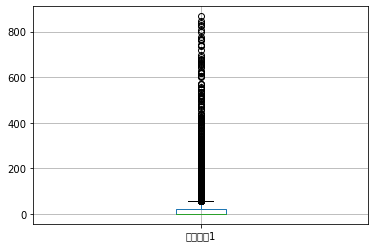

In [92]:
data_quxiao.boxplot('接单时间1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25509 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from cur

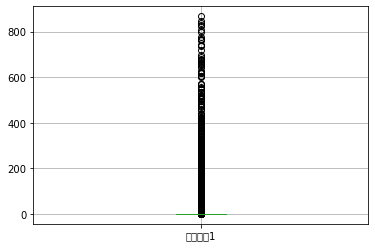

In [93]:
data.boxplot('接单时间1')

In [94]:
Q1 = np.percentile(data_quxiao['接单时间1'], 25)
Q3 = np.percentile(data_quxiao['接单时间1'], 75)
Q2 = np.percentile(data_quxiao['接单时间1'], 50)
IQ = Q3 - Q1

In [95]:
Q4 = Q3 + 1.5*IQ
print(Q4)

55.0


In [96]:
print(Q3)

22.0


In [97]:
print(Q2)

1.0


In [98]:
data_quxiao['接单时间1'].mean()

33.89535709214823

# 查看三种店铺情况

In [99]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour,接单时间1
0,\t20200824-20200826,2270353966510833,2020-08-24 11:39:36,6秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,否,359.0,125.0,0.0,234.0,七夕预售玫瑰专区\t,与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】,0.0,69,1,359.0,125.0,234.0,234.0,0.0,否,0,0.0,0.0,0.0,是,购买与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】原价359.0元现价128....,否,未回复,0,0.00分,0.0,2020-08-24 21:39:33\t,0,24,11,0
1,\t20200824-20200826,2270351601381307,2020-08-24 11:39:53,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,359.0,125.0,0.0,234.0,七夕预售玫瑰专区\t,与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】,0.0,69,1,359.0,125.0,234.0,234.0,0.0,否,0,0.0,0.0,0.0,是,购买与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】原价359.0元现价128....,否,已回复,0,0.00分,0.0,2020-08-25 13:15:46\t,0,24,11,0
2,\t20200824-20200826,2270352024161140,2020-08-24 13:27:22,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,389.0,145.9,0.1,243.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节鲜花花束】,0.0,947,1,389.0,145.9,243.1,243.0,0.1,否,0,0.0,0.0,0.0,是,用户使用了会员红包减10.1元/购买给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节鲜花花束...,否,未回复,0,0.00分,0.0,2020-08-25 14:33:53\t,0,24,13,0
3,\t20200824-20200826,2270352800320932,2020-08-24 16:18:07,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,389.0,146.0,0.0,243.0,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】,0.0,938,1,389.0,146.0,243.0,243.0,0.0,否,0,0.0,0.0,0.0,是,购买陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】原价389.0元现价149.0元/门店新客立减...,否,未回复,0,0.00分,0.0,2020-08-25 21:21:40\t,0,24,16,0
4,\t20200824-20200826,2270352620144691,2020-08-24 18:34:19,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,499.0,226.0,0.0,273.0,七夕特惠33专区\t,体贴【33枝香槟玫瑰搭配相思梅七夕情人节鲜花花束】,0.0,323,1,499.0,226.0,273.0,273.0,0.0,否,0,0.0,0.0,0.0,是,购买体贴【33枝香槟玫瑰搭配相思梅七夕情人节鲜花花束】原价499.0元现价229.0元/门店...,否,未回复,0,0.00分,0.0,2020-08-25 05:45:36\t,0,24,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57023,\t20200824-20200826,98095971677285159,2020-08-25 11:57:48,1秒,锦缘花艺·七夕鲜花\t,9809597,东营\t,在线支付,订单完成,用户提交订单,否,356.0,156.0,0.0,200.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】,0.0,947\t,1,356.0,156.0,200.0,200.0,0.0,否,0,0.0,0.0,0.0,是,购买给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节花束】原价356.0元现价159.0元/...,否,未回复,0,0.00分,0.0,2020-08-25 16:20:12\t,0,25,11,0
57024,\t20200824-20200826,98095973382704585,2020-08-25 17:19:00,0秒,锦缘花艺·七夕鲜花\t,9809597,东营\t,在线支付,订单已处理,用户提交订单,否,299.0,143.0,3.0,153.0,七夕特惠11专区\t,缘来是你【11枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】,0.0,237\t,1,299.0,143.0,156.0,153.0,3.0,否,0,0.0,0.0,0.0,是,用户使用了支付红包减3元/购买缘来是你【11枝红玫瑰搭配尤加利七夕情人节鲜花礼盒】原价299...,是,未回复,0,0.00分,0.0,0,0,25,17,0
57025,\t20200824-20200826,98095972141837702,2020-08-25 17:57:00,0秒,锦缘花艺·七夕鲜花\t,9809597,东营\t,在线支付,订单完成,用户提交订单,否,288.0,156.0,0.0,132.0,七夕特惠11专区\t,怦然心动A款【11枝红玫瑰七夕情人节表白礼盒鲜花礼盒】,0.0,343\t,1,288.0,156.0,132.0,132.0,0.0,否,0,0.0,0.0,0.0,是,购买怦然心动A款【11枝红玫瑰七夕情人节表白礼盒鲜花礼盒】原价288.0元现价159.0元/...,是,未回复,0,0.00分,0.0,2020-08-25 23:58:29\t,0,25,17,0
57026,\t20200824-20200826,98098403470084206,2020-08-25 14:12:17,176秒,忆花坊·七夕鲜花\t,9809840,无锡\t,在线支付,订单完成,配送中,否,499.0,236.0,0.0,263.0,七夕特惠33专区\t,我心属你【33枝红玫瑰七夕情人节表白黑纱花束】,0.0,939\t,1,499.0,236.0,263.0,263.0,0.0,否,0,0.0,0.0,0.0,是,购买我心属你【33枝红玫瑰七夕情人节表白黑纱花束】原价499.0元现价239.0元/门店新客...,否,未回复,0,0.00分,0.0,2020-08-25 23:39:16\t,0,25,14,0


In [100]:
a = drop_du(data,'店铺名称')
temp = sorted(a[1].items(), key=lambda x: x[1], reverse=True)
temp

[('邂逅花坊鲜花（先花店）\t', 467),
 ('邂逅花坊鲜花（缤纷花坊）\t', 328),
 ('邂逅花坊鲜花（BEWITHYOU早安花艺）\t', 287),
 ('邂逅花坊鲜花（缤纷花艺）\t', 237),
 ('千百渡花艺(七夕预定，表白，鲜花)\t', 227),
 ('邂逅花坊鲜花（心意花店喜糖）\t', 224),
 ('邂逅花坊鲜花（Ainoflowery）\t', 216),
 ('邂逅花坊鲜花（浪漫情缘）\t', 201),
 ('邂逅花坊鲜花（浪漫花屋）\t', 191),
 ('邂逅花坊鲜花（简爱花艺）\t', 190),
 ('邂逅花坊鲜花（七彩鲜花）\t', 180),
 ('邂逅花坊鲜花（豆豆花卉）\t', 179),
 ('邂逅花坊鲜花（花样年华）\t', 173),
 ('邂逅花坊鲜花（创懿花艺婚庆）\t', 172),
 ('邂逅花坊鲜花（嘉韵鲜花婚庆）\t', 168),
 ('邂逅花坊鲜花（淘花源）\t', 168),
 ('邂逅花坊鲜花（邂逅花坊）\t', 168),
 ('邂逅花坊鲜花（欣雨花店）\t', 167),
 ('邂逅花坊鲜花(若曦花园）\t', 166),
 ('邂逅花坊鲜花（花姐鲜花店）\t', 165),
 ('邂逅花坊鲜花(雅韵鲜花店）\t', 161),
 ('邂逅花坊鲜花（浪漫满屋）\t', 160),
 ('邂逅花坊鲜花（花香鲜花店）\t', 159),
 ('邂逅花坊鲜花（鲜花婚庆）\t', 158),
 ('邂逅花坊鲜花（花之语鲜花）\t', 156),
 ('邂逅花坊鲜花（花语鲜花）\t', 153),
 ('邂逅花坊鲜花（美美花卉）\t', 147),
 ('邂逅花坊鲜花（遇尚花坊）\t', 147),
 ('邂逅花坊鲜花（缘来是你鲜花）?\t', 144),
 ('邂逅花坊鲜花（玫凤花卉）\t', 143),
 ('邂逅花坊鲜花（时光花缘）\t', 141),
 ('邂逅花坊鲜花（倾心花艺）\t', 140),
 ('邂逅花坊鲜花（心意花坊）\t', 139),
 ('邂逅花坊鲜花（知音婚庆鲜花）\t', 137),
 ('邂逅花坊鲜花（鑫美花卉）\t', 133),
 ('邂逅花坊鲜花（花好月圆）\t', 132),
 ('邂逅花坊鲜花（百合文化）\t', 132),
 ('邂

In [101]:
b = drop_du(data_quxiao,'店铺名称')
temp = sorted(b[1].items(), key=lambda x: x[1], reverse=True)
temp

[('邂逅花坊鲜花（缤纷花坊）\t', 120),
 ('邂逅花坊鲜花（BEWITHYOU早安花艺）\t', 72),
 ('邂逅花坊鲜花（小仙女花艺）\t', 65),
 ('邂逅花坊鲜花（先花店）\t', 52),
 ('欢欢花艺坊(七夕预定，表白，鲜花)\t', 46),
 ('邂逅花坊鲜花（花颜花艺）\t', 43),
 ('心愿花屋(七夕预定，表白，鲜花)\t', 42),
 ('邂逅花坊鲜花（Ainoflowery）\t', 40),
 ('邂逅花坊鲜花（紫伊园艺）\t', 39),
 ('邂逅花坊鲜花（鑫缘鲜花）\t', 38),
 ('邂逅花坊鲜花（嘟妈SHOP颜如玉）\t', 33),
 ('51.K花店(七夕预定，表白，鲜花）\t', 32),
 ('邂逅花坊鲜花（阳光花坊）\t', 28),
 ('邂逅花坊鲜花（半夏花坊）\t', 25),
 ('邂逅花坊鲜花（沐恩花坊）\t', 25),
 ('邂逅花坊鲜花（浪漫情缘）\t', 25),
 ('邂逅花坊鲜花（花之语鲜花）\t', 24),
 ('邂逅花坊鲜花（花礼）\t', 24),
 ('花好月圆(七夕预定，表白，鲜花)\t', 24),
 ('艾诺鲜花（七夕预定，表白，鲜花）\t', 24),
 ('花语花艺(七夕预定，表白，鲜花)\t', 24),
 ('邂逅花坊鲜花（浪漫花屋）\t', 22),
 ('费费花园鲜花店(七夕预定，表白，鲜花)\t', 22),
 ('邂逅花坊鲜花（无限情意）\t', 21),
 ('邂逅花坊鲜花（心意花店喜糖）\t', 21),
 ('邂逅花坊鲜花（淘花源）\t', 21),
 ('邂逅花坊鲜花（知音婚庆鲜花）\t', 21),
 ('邂逅花坊鲜花（鑫怡花店）\t', 21),
 ('邂逅花坊鲜花(花语心愿花坊)\t', 21),
 ('花好月缘花店\t', 21),
 ('邂逅花坊鲜花（新世纪花艺）\t', 20),
 ('邂逅花坊鲜花（花花世界）\t', 20),
 ('邂逅花坊鲜花（醉美花坊）\t', 20),
 ('香奈尔鲜花(七夕预定，表白，鲜花)\t', 20),
 ('邂逅花坊鲜花（创懿花艺婚庆）\t', 19),
 ('邂逅花坊鲜花（SaSa花艺生活馆）\t', 19),
 ('邂逅花坊鲜花（佳偶花坊）\t', 19),
 ('邂逅花坊鲜

In [102]:
c = drop_du(data_quxiao_wrong,'店铺名称_x')
temp = sorted(c[1].items(), key=lambda x: x[1], reverse=True)
temp

[('邂逅花坊鲜花（BEWITHYOU早安花艺）\t', 36),
 ('心愿花屋(七夕预定，表白，鲜花)\t', 32),
 ('邂逅花坊鲜花（缤纷花坊）\t', 31),
 ('欢欢花艺坊(七夕预定，表白，鲜花)\t', 30),
 ('邂逅花坊鲜花（小仙女花艺）\t', 27),
 ('邂逅花坊鲜花（鑫缘鲜花）\t', 26),
 ('51.K花店(七夕预定，表白，鲜花）\t', 24),
 ('邂逅花坊鲜花（紫伊园艺）\t', 21),
 ('花好月圆(七夕预定，表白，鲜花)\t', 20),
 ('花好月缘花店\t', 19),
 ('邂逅花坊鲜花（花颜花艺）\t', 18),
 ('邂逅花坊鲜花（Ainoflowery）\t', 17),
 ('恒海鲜花(表白，生日，鲜花店)\t', 17),
 ('花语花艺(七夕预定，表白，鲜花)\t', 17),
 ('邂逅花坊鲜花（先花店）\t', 16),
 ('邂逅花坊鲜花（沐恩花坊）\t', 16),
 ('邂逅花坊鲜花（半夏花坊）\t', 15),
 ('邂逅花坊鲜花（花礼）\t', 15),
 ('邂逅花坊鲜花（醉美花坊）\t', 15),
 ('香奈尔鲜花(七夕预定，表白，鲜花)\t', 15),
 ('邂逅花坊鲜花（鑫怡花店）\t', 13),
 ('1314花艺馆(七夕预定，表白，鲜花)\t', 12),
 ('邂逅花坊鲜花（温馨鲜花店）\t', 11),
 ('浪漫满屋鲜花婚庆(七夕预定，表白，鲜花)\t', 11),
 ('邂逅花坊鲜花（创懿花艺婚庆）\t', 10),
 ('邂逅花坊鲜花（永鲜鲜花店）\t', 10),
 ('邂逅花坊鲜花（那些花儿）\t', 10),
 ('邂逅花坊鲜花（馨源花卉店）\t', 9),
 ('邂逅花坊鲜花（草木人茶艺馆）\t', 9),
 ('邂逅花坊鲜花（贵人花坊鲜花）\t', 9),
 ('邂逅花坊鲜花（顶好鲜花）\t', 9),
 ('邂逅花坊鲜花（淘花源）\t', 9),
 ('邂逅花坊鲜花（浪漫情缘）\t', 9),
 ('夜郎花卉(七夕预定，表白，鲜花)\t', 9),
 ('花无缺(七夕预定，表白，鲜花)\t', 9),
 ('锦上花开(七夕预定，表白，鲜花)\t', 9),
 ('青青花艺(七夕预定，表白，鲜花)\t', 9),
 ('邂逅花坊鲜

# 七夕订单上涨幅度

In [103]:
df24

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
0,\t20200824-20200826,2270353966510833,2020-08-24 11:39:36,6秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,否,359.0,125.0,0.0,234.0,七夕预售玫瑰专区\t,与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】,NaN,69,1,359.0,125.0,234.0,234.0,0.0,否,0,0.0,0.0,0.0,是,购买与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】原价359.0元现价128....,否,未回复,NaN,0.00分,0.0,2020-08-24 21:39:33\t,NaN,24,11
1,\t20200824-20200826,2270351601381307,2020-08-24 11:39:53,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,359.0,125.0,0.0,234.0,七夕预售玫瑰专区\t,与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】,NaN,69,1,359.0,125.0,234.0,234.0,0.0,否,0,0.0,0.0,0.0,是,购买与你一诺相许【11枝红玫瑰搭配小熊满天星七夕情人节鲜花礼盒】原价359.0元现价128....,否,已回复,NaN,0.00分,0.0,2020-08-25 13:15:46\t,NaN,24,11
2,\t20200824-20200826,2270352024161140,2020-08-24 13:27:22,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,389.0,145.9,0.1,243.0,七夕特惠11专区\t,给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节鲜花花束】,NaN,947,1,389.0,145.9,243.1,243.0,0.1,否,0,0.0,0.0,0.0,是,用户使用了会员红包减10.1元/购买给你的情书【11枝红玫瑰搭配粉色满天星七夕情人节鲜花花束...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:33:53\t,NaN,24,13
3,\t20200824-20200826,2270352800320932,2020-08-24 16:18:07,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,用户提交订单,是,389.0,146.0,0.0,243.0,七夕特惠11专区\t,陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】,NaN,938,1,389.0,146.0,243.0,243.0,0.0,否,0,0.0,0.0,0.0,是,购买陪我一生【11枝红玫瑰七夕情人节鲜花礼盒】原价389.0元现价149.0元/门店新客立减...,否,未回复,NaN,0.00分,0.0,2020-08-25 21:21:40\t,NaN,24,16
4,\t20200824-20200826,2270352620144691,2020-08-24 18:34:19,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,499.0,226.0,0.0,273.0,七夕特惠33专区\t,体贴【33枝香槟玫瑰搭配相思梅七夕情人节鲜花花束】,NaN,323,1,499.0,226.0,273.0,273.0,0.0,否,0,0.0,0.0,0.0,是,购买体贴【33枝香槟玫瑰搭配相思梅七夕情人节鲜花花束】原价499.0元现价229.0元/门店...,否,未回复,NaN,0.00分,0.0,2020-08-25 05:45:36\t,NaN,24,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56975,\t20200824-20200826,98029251269807160,2020-08-24 22:18:32,0秒,名花有主·七夕鲜花\t,9802925,广州\t,在线支付,订单完成,用户提交订单,是,299.0,136.0,0.0,163.0,七夕特惠11专区\t,琴瑟之好【11枝粉玫瑰搭配尤加利七夕情人节鲜花花束】,NaN,261\t,1,299.0,136.0,163.0,163.0,0.0,否,0,0.0,0.0,0.0,是,购买琴瑟之好【11枝粉玫瑰搭配尤加利七夕情人节鲜花花束】原价299.0元现价139.0元/门...,否,未回复,NaN,0.00分,0.0,2020-08-25 21:23:08\t,NaN,24,22
56986,\t20200824-20200826,98055631269807160,2020-08-24 10:21:03,56秒,百合鲜花\t,9805563,沧州\t,在线支付,订单完成,用户提交订单,否,499.0,286.0,0.0,213.0,七夕特惠33专区\t,长相思守【33枝红玫瑰搭配尤加利七夕情人节抱抱桶】,NaN,240\t,1,499.0,286.0,213.0,213.0,0.0,否,0,0.0,0.0,0.0,是,购买长相思守【33枝红玫瑰搭配尤加利七夕情人节抱抱桶】原价499.0元现价289.0元/门店...,是,已回复,NaN,0.00分,0.0,2020-08-24 12:32:47\t,NaN,24,10
56987,\t20200824-20200826,98055633049752078,2020-08-24 12:26:02,126秒,百合鲜花\t,9805563,沧州\t,在线支付,订单完成,配送中,否,399.0,185.0,0.0,214.0,七夕特惠19专区\t,钟爱一生【19枝红玫瑰搭配满天星七夕表白黑纱花束】,NaN,016\t,1,399.0,185.0,214.0,214.0,0.0,否,0,0.0,0.0,0.0,是,购买钟爱一生【19枝红玫瑰搭配满天星七夕表白黑纱花束】原价399.0元现价188.0元/门店...,否,未回复,NaN,0.00分,0.0,2020-08-24 20:11:55\t,NaN,24,12
56988,\t20200824-20200826,98055633736842411,2020-08-24 17:17:24,0秒,百合鲜花\t,9805563,沧州\t,在线支付,订单完成,用户提交订单,是,499.0,256.0,0.0,243.0,七夕特惠33专区\t,凤凰于飞【33枝红玫瑰白色满天星尤加利七夕情人节鲜花花束】,NaN,218\t,1,499.0,256.0,243.0,243.0,0.0,否,0,0.0,0.0,0.0,是,购买凤凰于飞【33枝红玫瑰白色满天星尤加利七夕情人节鲜花花束】原价499.0元现价259.0...,否,未回复,NaN,0.00分,0.0,2020-08-25 23:41:52\t,NaN,24,17


In [106]:
a = drop_du(df24,'下单时间_hour')
collection_d = Counter(a[1])
print(collection_d)


Counter({22: 1164, 23: 1090, 21: 1083, 20: 932, 19: 813, 18: 766, 17: 689, 16: 572, 14: 560, 15: 548, 12: 546, 13: 517, 11: 483, 10: 400, 9: 371, 8: 232, 7: 121, 0: 54, 6: 30, 1: 29, 2: 21, 3: 13, 5: 13, 4: 6})


In [107]:
b = drop_du(df25,'下单时间_hour')
collection_e = Counter(b[1])
print(collection_e)

Counter({9: 4540, 10: 4449, 11: 4129, 12: 3994, 13: 3525, 8: 3349, 14: 3184, 15: 3019, 16: 2493, 17: 2096, 18: 1913, 7: 1651, 19: 1501, 20: 1139, 0: 959, 21: 886, 6: 631, 22: 581, 1: 504, 2: 261, 5: 228, 3: 174, 4: 140, 23: 48})


In [108]:
df24 = pd.DataFrame(pd.Series(a[1]), columns=['count'])
df24 = df24.reset_index().rename(columns={'index':'time'})
df24.sort_values("time",inplace=True)
df24['time'] = df24['time'].apply(str)


In [109]:
df25 = pd.DataFrame(pd.Series(b[1]), columns=['count'])
df25 = df25.reset_index().rename(columns={'index':'time'})
df25.sort_values("time",inplace=True)
df25['time'] = df25['time'].apply(str)


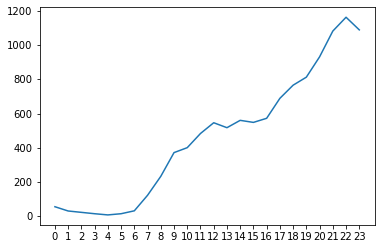

In [111]:
import matplotlib.pyplot as plt
plt.plot(df24['time'],df24['count'])


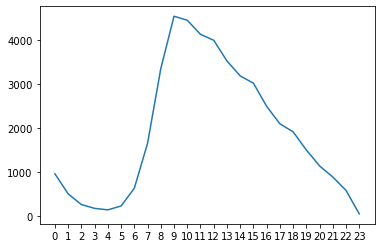

In [112]:
plt.plot(df25['time'],df25['count'])